# Excel to Empirical
In this example, we will read *ab-initio* data from an Excel spreadsheet and create a Nasa object from it. Even though we use a Nasa object here, the Shomate class also has the ability to be generated from a StatMech model.

## Topics Covered
- Reading *ab-initio* data from an Excel file
- Initialize Reference objects and a References object
- Generate a Nasa object using StatMech models
- Write Nasa object to a thermdat file

## Files Required
- [references.xlsx](references.xlsx) (Excel spreadsheet containing *ab-initio* and experimental data for reference species)
- [input.xlsx](input.xlsx) (Excel spreadsheet containing *ab-initio* data for the species you would like to generate Nasa objects
- files containing atomic coordinates (files that can be read using ase.io.read. These files are only necessary if using rotational and translational modes (which tend to only be relevant for gas-phase species). For this example, we are using CONTCAR files. 

## Importing the *ab-initio* data from Excel
First, we will import data from the ``input.xlsx`` spreadsheet. The contents of the spreadsheet are shown below.

| name      | phase | elements.C | elements.H | elements.O | statmech_model | potentialenergy | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber |
|-----------|-------|------------|------------|------------|----------------|-----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|
| H2_cus(S) | S     | 0          | 2          | 0          | Harmonic       | -6.98609748     | 3066.979319    | 1520.963162    | 846.589184     | 537.019612     | 469.648212     | 444.089371     |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |
| H2Obr(S)  | S     | 0          | 2          | 1          | Harmonic       | -14.813281      | 3732.4315      | 3615.316915    | 1533.760861    | 451.030069     | 429.209457     | 389.942902     | 204.875732     | 162.988907     | 113.146516     |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |
| H2Ocus(S) | S     | 0          | 2          | 1          | Harmonic       | -15.4204017     | 3732.4315      | 3615.316915    | 1533.760861    | 451.030069     | 429.209457     | 389.942902     | 204.875732     | 162.988907     | 113.146516     |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |
| H_cus(S)  | S     | 0          | 1          | 0          | Harmonic       | -3.47020748     | 1868.8092      | 681.336865     | 578.20889      |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |
| HObr(S)   | S     | 0          | 1          | 1          | Harmonic       | -11.577085      | 3678.377186    | 851.655046     | 573.216546     | 418.298492     | 374.446393     | 204.720161     |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |
| Obr(S)    | S     | 0          | 0          | 1          | Harmonic       | -7.519858       | 537.116485     | 439.995941     | 256.38412      |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |
| IPA(S)    | S     | 3          | 8          | 1          | Harmonic       | -64.935392      | 3072.824921    | 3056.583116    | 3049.635786    | 3038.996872    | 3031.532711    | 3008.868219    | 2969.688478    | 2956.451871    | 1460.613697    | 1454.472854    | 1435.981201    | 1432.413496    | 1413.554005    | 1366.129117    | 1353.211574    | 1327.903925    | 1321.25272     | 1148.721745    | 1130.053472    | 1098.855825    | 933.64652      | 921.005746     | 903.030098     | 825.727381     | 809.440337     | 535.60253      | 414.794848     | 378.193102     | 295.278829     | 237.586784     | 230.560246     | 171.110789     | 129.36901      | 77.415076      | 64.350293      | 56.879635      |

To import the data, we use the ``pmutt.io.excel.read_excel`` function.

In [1]:
from pprint import pprint
from pmutt.io.excel import read_excel
import os

print(os.getcwd())
species_data = read_excel(io='./test/input.xlsx')
pprint(species_data)

C:\Users\jonat\Dropbox\UDel Documents (Dropbox)\UDel Research\Github\pMuTT_development\docs\source\examples_jupyter\excel_to_empirical
[{'elec_model': <class 'pmutt.statmech.elec.GroundStateElec'>,
  'elements': {'C': 0, 'H': 2, 'O': 0},
  'name': 'H2_cus(S)',
  'phase': 'S',
  'potentialenergy': -6.9860974799998985,
  'required': ('vib_wavenumbers', 'potentialenergy', 'spin'),
  'statmech_model': <class 'pmutt.statmech.StatMech'>,
  'vib_model': <class 'pmutt.statmech.vib.HarmonicVib'>,
  'vib_wavenumbers': [3066.979319,
                      1520.963162,
                      846.589184,
                      537.019612,
                      469.648212,
                      444.089371]},
 {'elec_model': <class 'pmutt.statmech.elec.GroundStateElec'>,
  'elements': {'C': 0, 'H': 2, 'O': 1},
  'name': 'H2Obr(S)',
  'phase': 'S',
  'potentialenergy': -14.81328099999996,
  'required': ('vib_wavenumbers', 'potentialenergy', 'spin'),
  'statmech_model': <class 'pmutt.statmech.StatMech'>,


Note that the output of ``read_excel`` is a list of dictionaries. Each dictionary in the list corresponds to the data to initialize the objects.

## Importing the *ab-initio* references data from Excel
Before initializing the Nasa objects, we have to adjust the enthalpies from the DFT reference to the standard reference (i.e. pure species have an enthalpy of 0 at 298 K and 1 atm). The references.xlsx file contains the following information.

| name | phase | elements.C | elements.H | elements.O | statmech_model | T_ref | HoRT_ref   | potentialenergy | atoms         | symmetrynumber | spin | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber | vib_wavenumber |
|------|-------|------------|------------|------------|----------------|-------|------------|-----------------|---------------|----------------|------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|
| IPA  | G     | 3          | 8          | 1          | IdealGas       | 298   | -110.1078  | -63.6353        | ./CONTCAR_IPA | 1              | 0    | 3695.6947      | 3058.1512      | 3056.3031      | 3037.6154      | 3027.4596      | 2977.8791      | 2962.0141      | 2959.4138      | 1455.9381      | 1446.9241      | 1432.5845      | 1430.694       | 1365.4299      | 1359.4158      | 1345.7613      | 1312.957       | 1258.3806      | 1144.4464      | 1121.8044      | 1043.2856      | 936.5137       | 910.6527       | 894.8818       | 802.0075       | 459.1458       | 414.8802       | 355.2703       | 261.3417       | 250.5753       | 219.2591       |
| H2O  | G     | 0          | 2          | 1          | IdealGas       | 298   | -97.606043 | -14.2209        | ./CONTCAR_H2O | 2              | 0    | 3825.434       | 3710.2642      | 1582.432       |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |
| H2   | G     | 0          | 2          | 0          | IdealGas       | 298   | 0          | -6.7598         | ./CONTCAR_H2  | 2              | 0    | 4306.1793      |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |                |

Note that these species contain extra fields, such as ``atoms``, ``symmetrynumber``, and ``spin`` since the ``IdealGas`` statistical mechanical model will be used. The ``T_ref`` and ``HoRT_ref`` are extra fields that are necessary for reference species.

In [2]:
refs_input = read_excel(io='references.xlsx')
pprint(refs_input)

[{'HoRT_ref': -110.10779908717083,
  'T_ref': 298,
  'atoms': Atoms(symbols='H6C5O2', pbc=True, cell=[12.843615942469413, 9.254207587944354, 28.20143514534594]),
  'elec_model': <class 'pmutt.statmech.elec.GroundStateElec'>,
  'elements': {'C': 3, 'H': 8, 'O': 1},
  'n_degrees': 3,
  'name': 'IPA',
  'optional': 'atoms',
  'phase': 'G',
  'potentialenergy': -63.6353,
  'required': ('molecular_weight',
               'vib_wavenumbers',
               'potentialenergy',
               'spin',
               'geometry',
               'rot_temperatures',
               'symmetrynumber'),
  'rot_model': <class 'pmutt.statmech.rot.RigidRotor'>,
  'spin': 0,
  'statmech_model': <class 'pmutt.statmech.StatMech'>,
  'symmetrynumber': 1,
  'trans_model': <class 'pmutt.statmech.trans.FreeTrans'>,
  'vib_model': <class 'pmutt.statmech.vib.HarmonicVib'>,
  'vib_wavenumbers': [3695.6947,
                      3058.1512,
                      3056.3031,
                      3037.6154,
             

Now that we've imported the data, we can make a ``References`` object, which is made of ``Reference`` objects using the following syntax.

In [3]:
from pmutt.empirical.references import Reference, References

refs = References(descriptor='elements', 
                  references=[Reference(**ref_input) 
                              for ref_input in refs_input])
print(refs.offset)

{'C': -357.259494801186, 'H': -124.67018779818417, 'O': -180.81926439919044}


The ``References`` object calculated the offset between C, H, and O.

## Initialize the Nasa objects
The ``from_statmech`` method allows us to initialize the Nasa objects from the data.

In [4]:
from pmutt.empirical.nasa import Nasa

T_low = 300. # K
T_high = 1100. # K

species = [Nasa.from_statmech(references=refs, T_low=T_low, T_high=T_high, 
                              **specie_data) for specie_data in species_data]
# Printing an example of a Nasa species
print(species[0])

## Writing Nasa objects to a Thermdat file

In [5]:
from pmutt.io.thermdat import write_thermdat

write_thermdat(nasa_species=species, filename='thermdat',
               write_date=True)

```
THERMO ALL
       100       500      1500
H2_cus(S)       20181106H   2               S300.0     1100.0    610.2         1
-1.32355622E-01 1.17210568E-02-1.21067695E-05 6.77414609E-09-1.56703390E-12    2
-1.96714519E+03-1.13778416E+00-2.37252750E+00 2.60714871E-02-4.73583826E-05    3
 4.61096590E-08-1.83624246E-11-1.68126562E+03 8.63949434E+00                   4
H2Obr(S)        20181106H   2O   1          S300.0     1100.0    561.2         1
 3.33914632E+00 8.65676156E-03-1.03441245E-05 7.11690970E-09-1.91112739E-12    2
-3.65073462E+04-1.59589792E+01 3.68293150E-01 3.06585581E-02-7.30019576E-05    3
 8.80731362E-08-4.17597362E-11-3.61771342E+04-3.41520582E+00                   4
H2Ocus(S)       20181106H   2O   1          S300.0     1100.0    561.2         1
 3.33914632E+00 8.65676156E-03-1.03441245E-05 7.11690970E-09-1.91112739E-12    2
-4.35526918E+04-1.59589792E+01 3.68293150E-01 3.06585581E-02-7.30019576E-05    3
 8.80731362E-08-4.17597362E-11-4.32224798E+04-3.41520582E+00                   4
H_cus(S)        20181106H   1               S300.0     1100.0    544.9         1
-4.56626289E-01 6.52756961E-03-5.72385869E-06 2.56064809E-09-4.74217654E-13    2
-8.86598312E+02 1.29145407E+00-1.70971795E+00 1.57880872E-02-3.17011214E-05    3
 3.53093929E-08-1.61102148E-11-7.49187896E+02 6.57564204E+00                   4
HObr(S)         20181106H   1O   1          S300.0     1100.0    610.2         1
 1.32317902E+00 1.07943705E-02-1.40435635E-05 9.13293283E-09-2.29632826E-12    2
-3.92614463E+04-7.89440118E+00-1.90464381E+00 3.13120166E-02-6.40095247E-05    3
 6.43701568E-08-2.56553082E-11-3.88467774E+04 6.21680636E+00                   4
Obr(S)          20181106O   1               S300.0     1100.0    561.2         1
 1.10929486E+00 6.02227730E-03-8.09582034E-06 5.13595359E-09-1.26396875E-12    2
-3.27394702E+04-6.27416658E+00-1.46028728E+00 2.43280424E-02-5.80735069E-05    3
 6.69898412E-08-3.04663321E-11-3.24443213E+04 4.66839332E+00                   4
IPA(S)          20181106C   3H   8O   1     S300.0     1100.0    544.9         1
-2.41027713E+00 6.03014873E-02-5.21384920E-05 2.61809899E-08-5.76980678E-12    2
-4.86845128E+04 1.14685801E+01 6.36065045E+00-8.82654398E-03 1.52433654E-04    3
-2.43446336E-07 1.27830717E-10-4.95747767E+04-2.48996210E+01                   4
END
```

## Checking the fit of the Nasa object
To see if the Nasa object's predictions of the thermodynamic data matches the statistical mechanical model inputted, use the ``plot_statmech_and_empirical`` method.

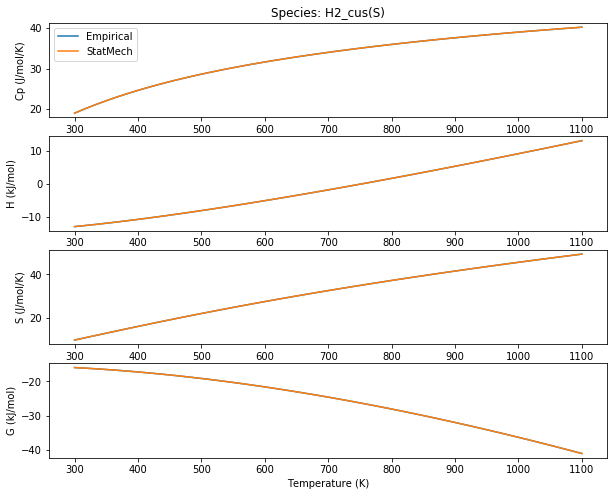

In [6]:
fig, ax = species[0].plot_statmech_and_empirical(Cp_units='J/mol/K', H_units='kJ/mol',
                                                 S_units='J/mol/K', G_units='kJ/mol')
fig.set_size_inches((10, 8))